# Rain Event Finder--Rain Gardens
The purpose of this notebook is to identify rain events from raw data files, and provide the corresponding rainfall (in inches) and volume flow (in liters). Hopefully this won't get too technical.
Before we get started:
1. Make sure that you have a csv file, not an excel file. That csv file should contain data regarding rainfall and flow rate.
2. always use quotes ("" or '') when passing in column names to functions. I chose to use single quotes, but it doesn't matter. Row names do not need quotes.
3. In order to load, or run, each cell, hold the "shift" key and then press "return". The cell that will be run is the one highlighted by blue on the left.
4. You might need to comment certain lines out. I have certain "default" lines that should do all the work for us, but if you want to use some of my functions in a different way, then commenting things may be useful. Simply stick a "#" in front of the line (you'll see that I've done this with several lines). Similarly, to un-comment a line, just remove the '#'

Load the following cell:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
from datetime import datetime
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 1000)


In order to import our data, replace "2019-2020 rain gardens vs rain.csv" with the name of your data file. Make sure that the csv file is in the same folder that this file, rain_event_finder.ipynb is in. You can check http://localhost:8888/tree/wsu_puyallup to make sure that the correct csv file is in the same folder as this file. I have "2019-2020 rain gardens vs rain.csv" currently loaded, as it is the name excel spit out when I saved the excel sheet of raw data as a csv file.
Note: you may see a red message pop up that says
<p>"/srv/app/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: ..."</p>
Feel free to ignore it! It's just saying our data contains more than one kind of data, which is obvious.
## Checkpoint
<b>If you feel like you have royally screwed something up, then come back to this cell!</b>

In [2]:
df = pd.read_csv('data/2019-2020 rain gardens vs rain.csv')
converted_to_in = [False]
df

/Users/andyflury/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date/Time,Pole Rain,G rain,Temp,TOA5,86583,CR1000.Std.31.03,CPU:Station3 rain garden 09-11-19.CR1,1865,Hydro,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,NaN,NaN,NaN,NaN,TIMESTAMP,Q_101_litsec_Avg,Q_102_litsec_Avg,Q_103_litsec_Avg,Q_104_litsec_Avg,Q_201_litsec_Avg,Q_202_litsec_Avg,Q_203_litsec_Avg,Q_204_litsec_Avg,Q_301_litsec_Avg,Q_302_litsec_Avg,Q_303_litsec_Avg,Q_304_litsec_Avg,Q_401_litsec_Avg,Q_402_litsec_Avg,Q_403_litsec_Avg,Q_404_litsec_Avg,Q_IN_litsec_Avg,Sample_Count(1),Sample_Count(2),Sample_Count(3),Sample_Count(4),Sample_Count(5),Sample_Count(6),Sample_Count(7),Sample_Count(8),Sample_Count(9),Sample_Count(10),Sample_Count(11),Sample_Count(12),Sample_Count(13),Sample_Count(14),Sample_Count(15),Sample_Count(16),Sample_Count(17)
1,NaN,NaN,NaN,NaN,TS,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count
2,NaN,NaN,NaN,NaN,NaN,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp
3,10/1/2019 0:00,0.0,0.0,3.3,10/1/2019 0:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10/1/2019 0:05,0.0,0.0,3.3,10/1/2019 0:05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78483,6/29/2020 12:00,0.0,0.0,19.2,6/29/2020 12:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
78484,NaN,NaN,NaN,NaN,6/29/2020 12:05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
78485,NaN,NaN,NaN,NaN,6/29/2020 12:10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
78486,NaN,NaN,NaN,NaN,6/29/2020 12:15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


# Cleaning up the table
Now that we've loaded in our data, you may notice it looks a bit messy. Jupyter Notebook recognizes the **bolded** words at the top of the table as the column labels. Some of the column labels may be correct, but some may be slightly confusing. If you want to change the names of the columns, first load the following cell to define the proper functions.

In [3]:
def rename_one_column(old_column_name, new_column_name):
    """Renames one column of the df dataframe.
    old_column_name : the bolded name that you wish to change
    new_column_name : the name that you wish to replace the old label with
    
    Returns none. Simply modifies the df.
    """
    column_names = df.columns.tolist()
    for i in range(len(column_names)):
        if column_names[i] == old_column_name:
            column_names[i] = new_column_name
            df.columns = column_names
            return
    print('No column was found with the given name: ' + old_column_name)
    print('These are the current column names: ')
    print(df.columns.tolist())

The following cell will change the names of all the relevant columns (relevant in my opinion). These columns contain rainfall data, timestamps, and flow rate data for all 16 rain gardens and the cistern.

In [4]:
#Default
rename_one_column('Pole Rain ', 'Pole Rain')
rename_one_column('86583', '101')
rename_one_column('CR1000.Std.31.03', '102')
rename_one_column('CPU:Station3  rain garden 09-11-19.CR1', '103')
rename_one_column('1865', '104')
rename_one_column('Hydro', '201')
rename_one_column('Unnamed: 10', '202')
rename_one_column('Unnamed: 11', '203')
rename_one_column('Unnamed: 12', '204')
rename_one_column('Unnamed: 13', '301')
rename_one_column('Unnamed: 14', '302')
rename_one_column('Unnamed: 15', '303')
rename_one_column('Unnamed: 16', '304')
rename_one_column('Unnamed: 17', '401')
rename_one_column('Unnamed: 18', '402')
rename_one_column('Unnamed: 19', '403')
rename_one_column('Unnamed: 20', '404')
rename_one_column('Unnamed: 21', 'Cistern')

df

,Date/Time,Pole Rain,G rain,Temp,TOA5,101,102,103,104,201,202,203,204,301,302,303,304,401,402,403,404,Cistern,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,NaN,NaN,NaN,NaN,TIMESTAMP,Q_101_litsec_Avg,Q_102_litsec_Avg,Q_103_litsec_Avg,Q_104_litsec_Avg,Q_201_litsec_Avg,Q_202_litsec_Avg,Q_203_litsec_Avg,Q_204_litsec_Avg,Q_301_litsec_Avg,Q_302_litsec_Avg,Q_303_litsec_Avg,Q_304_litsec_Avg,Q_401_litsec_Avg,Q_402_litsec_Avg,Q_403_litsec_Avg,Q_404_litsec_Avg,Q_IN_litsec_Avg,Sample_Count(1),Sample_Count(2),Sample_Count(3),Sample_Count(4),Sample_Count(5),Sample_Count(6),Sample_Count(7),Sample_Count(8),Sample_Count(9),Sample_Count(10),Sample_Count(11),Sample_Count(12),Sample_Count(13),Sample_Count(14),Sample_Count(15),Sample_Count(16),Sample_Count(17)
1,NaN,NaN,NaN,NaN,TS,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count
2,NaN,NaN,NaN,NaN,NaN,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp
3,10/1/2019 0:00,0.0,0.0,3.3,10/1/2019 0:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10/1/2019 0:05,0.0,0.0,3.3,10/1/2019 0:05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78483,6/29/2020 12:00,0.0,0.0,19.2,6/29/2020 12:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
78484,NaN,NaN,NaN,NaN,6/29/2020 12:05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
78485,NaN,NaN,NaN,NaN,6/29/2020 12:10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
78486,NaN,NaN,NaN,NaN,6/29/2020 12:15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [5]:
#Run this cell to see the current column names. You can then just copy and paste the ones you want to change
df.columns

Index(['Date/Time', 'Pole Rain', 'G rain ', 'Temp ', 'TOA5', '101', '102',
       '103', '104', '201', '202', '203', '204', '301', '302', '303', '304',
       '401', '402', '403', '404', 'Cistern', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38'],
      dtype='object')

If you wish to change each column individually, then replace 'OLD NAME' with the column name that you wish to change, and replace 'NEW NAME' with the name you wish to give it.
Make sure to uncomment (remove the # from the front of the line) before you run it.
You can run the following cell as many times as necessary, changing the arguments.

In [6]:
#rename_one_column('OLD NAME', 'NEW NAME')

We're going to clean up the table by removing unwanted rows and columns.
The following cell defines a function that removes unwanted columns. Run it to define the function.

In [7]:
def specify_data(*args):
    """Removes unwanted columns from the df dataframe. 
    *args : a variable number of arguments. They must be in quotes and separated by commas
    
    Returns the modified dataframe.
    Valid calls:
    >>> specify_data('Hello')
    >>> specify_data('Column 1', 'Column 2', 'Column 3')
    
    """
    columns_to_keep = []
    for col in args:
        columns_to_keep += [col]
    try:
        df1 = df[columns_to_keep]
    except Exception as e:
        print(e)
        print("The column names are: ")
        print(df.columns.tolist())
        print("Please run the cell again.")
        return df
    df1 = df[columns_to_keep]
    return df1

def remove_rows(*args):
    """Removes rows from the dataframe df
    
    *args : a variable number of arguments. Must be positive integers, separated by commmas. DO NOT USE QUOTES.
    
    Valid calls:
    >>>remove_rows(1, 2, 3)
    >>>remove_rows(0)
    >>>remove_rows(72)
    
    Returns the modified dataframe.
    """
    row_names = list(args)
    try:
        df1 = df.drop(df.index[row_names])
    except Exception as e:
        print(e)
        print('The most likely error is that there is no row with the given label. Make sure not to use quotes with row labels, just numbers')
    df1 = df.drop(df.index[row_names])
    df1 = df1.reset_index()
    df1 = df1.drop("index", axis = 1)
    return df1

Run the cell below to select the following columns. If you want to specify a different set of columns, simply delete everything within the parenthesis of specify_data, and write in new column names.
For example:
specify_data("Date/Time", "Pole Rain")
would result in a table with only the Date/Time Column and Pole Rain column

In [8]:
df = specify_data('Date/Time', 'Pole Rain', '101', '102', '103', '104', '201', '202', '203', '204', '301', '302', '303', '304', '401', '402', '403', '404', 'Cistern')
df

,Date/Time,Pole Rain,101,102,103,104,201,202,203,204,301,302,303,304,401,402,403,404,Cistern
0,NaN,NaN,Q_101_litsec_Avg,Q_102_litsec_Avg,Q_103_litsec_Avg,Q_104_litsec_Avg,Q_201_litsec_Avg,Q_202_litsec_Avg,Q_203_litsec_Avg,Q_204_litsec_Avg,Q_301_litsec_Avg,Q_302_litsec_Avg,Q_303_litsec_Avg,Q_304_litsec_Avg,Q_401_litsec_Avg,Q_402_litsec_Avg,Q_403_litsec_Avg,Q_404_litsec_Avg,Q_IN_litsec_Avg
1,NaN,NaN,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S,L/S
2,NaN,NaN,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg
3,10/1/2019 0:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10/1/2019 0:05,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78483,6/29/2020 12:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78484,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78485,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78486,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Replace ROWS with the label of the row you wish to remove. DO NOT USE QUOTES. For example,
df = remove_rows(0, 1, 2) will remove rows 0, 1, and 2 from the table. The cell below will remove the first three rows, which are just extra labels we don't care about. You can remove whichever ones you want by deleting the contents of the parenthesis and replacing them with whatever you want.
For example,
remove_rows(3, 4, 6, 7)
would remove rows 3, 4, 6, and 7.
remove_rows(1)
would remove 1

In [9]:
#Default
df = remove_rows(0, 1, 2)
df

,Date/Time,Pole Rain,101,102,103,104,201,202,203,204,301,302,303,304,401,402,403,404,Cistern
0,10/1/2019 0:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10/1/2019 0:05,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10/1/2019 0:10,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10/1/2019 0:15,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10/1/2019 0:20,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78480,6/29/2020 12:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78481,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78482,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78483,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In order to remove "NaN" values, run the following cell.

In [10]:
df = df.dropna()
df = df.reset_index()
df = df.drop("index", axis = 1)
pd.set_option('display.max_rows', 4)
df

,Date/Time,Pole Rain,101,102,103,104,201,202,203,204,301,302,303,304,401,402,403,404,Cistern
0,10/1/2019 0:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10/1/2019 0:05,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78405,6/29/2020 11:55,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78406,6/29/2020 12:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We need to make sure that our values are in the correct format. Define the following function by running the following cell.
If you have a column for the date/time, then replace date_column with the corresponding name.
Make sure that all values except for the Date/Time column are numbers (decimals are okay).

In [11]:
def reformat(date_column):
    """Reformats the strings in the table to be floats.
    date_column : the name (string) of the column of df that contains date information.

    Returns none. Modifies df.
    """
    columns = df.columns.tolist()
    columns.remove(date_column)
    for col in columns:
        for i in range(len(df[col])):
            df.at[i, col] = float(df.at[i, col])

Run the cell below to reformat all the values except the date/time column. If your date/time column has a different name, replace 'Date/Time' with that name (still use the quotes). This cell may take a few seconds to run.

In [12]:
#Replace 'Date/Time' with the name for the column, in quotes.
#This cell should display the table, with not very much changing.
reformat('Date/Time')
df

,Date/Time,Pole Rain,101,102,103,104,201,202,203,204,301,302,303,304,401,402,403,404,Cistern
0,10/1/2019 0:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10/1/2019 0:05,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78405,6/29/2020 11:55,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78406,6/29/2020 12:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Only run the following cell if you want the rainfall to be in inches.**
The following function will convert the given column name from mm to inches. Load the following cell to define the function.

In [13]:
def convert_to_in(rain_column):
    """Converts mm into inches.
    rain_column : the name of the column that contains rain data (should be in mm)
    
    Returns the modified dataframe.
    """
    if converted_to_in[0]:
        print('You have already converted the table to inches. Are you sure you want to convert again?')
        return df
    else:
        df[rain_column] = df[rain_column].divide(25.4)
        df1 = df
        converted_to_in[0] = True
        return df1

Replace 'Pole Rain' with the name of your column that contains rain data, in quotes. The table with converted measurements should be displayed. If you want the table to list rainfall in inches, uncomment the next line (remove the # from the front), and run the cell.
**If you decide to convert to inches, make sure to change the min_rain to .15 in the rain_event_finder function below. If you do not do this, the function will not work properly**

In [14]:
df = convert_to_in('Pole Rain')
df

,Date/Time,Pole Rain,101,102,103,104,201,202,203,204,301,302,303,304,401,402,403,404,Cistern
0,10/1/2019 0:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10/1/2019 0:05,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78405,6/29/2020 11:55,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78406,6/29/2020 12:00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The following function will return a table that displays the rain events, their dates, and the sum of the flows of the other columns. It's a bit complicated, but it's also the last step. Load the following cell to define the function. 

In [15]:
def find_rain_event(rain_column, date_column, gap=72, min_rain = .15):
    """
    Finds rain events, which are defined by rain of at least 3.81 inches,with gaps less
    than six hours.
    
    rain_column : the name of the column that contains rain data
    date_column : the name of the column that contains date data
    gap : the gap after which, with no rain, a rain event ends. Because the table
          has intervals of 5 min, gap is set by default to 72
          (5 * 72 = 360 minutes = 6 hours)
    min_rain : the minimum rain required for a rain event. Set by default to 3.81,
               which is in mm. If you have your table in inches, change 3.81 to .15.
               Do not use quotes for this number.
    
    
    Returns a dataframe of rain events with the start date, end date, amount of rain, and
    flow through each raingarden.
    """
    start_index = 0
    curr_index = 0
    rain_total = 0
    curr_gap = 0
    rain_event_found = False
    old_columns = df.columns.tolist()
    old_columns.remove(date_column)
    new_columns = ["Start Date", "End Date"] + old_columns
    total_df = pd.DataFrame(columns = new_columns)
    while curr_index < len(df.index):
        current_rain = df.at[curr_index, rain_column]
        if rain_total >= min_rain:
            if curr_gap == gap:
                #We've found the end of our rain event
                #Add sums to the total_df
                event_only_df = pd.DataFrame(columns = df.columns)
                event_only_df = event_only_df.append(df.loc[start_index : curr_index + 1, : ])
                sums = event_only_df.sum()
                for col in sums.index:
                    if col != rain_column and col != date_column:
                        sums[col] *= 300
                sums = sums.drop(labels = [date_column])
                start_date = df.at[start_index, date_column]
                end_date = df.at[curr_index, date_column]
                event_values = [start_date, end_date] + sums.tolist()
                series_index = new_columns
                event_series = pd.Series(event_values, index = series_index)
                total_df = total_df.append(event_series, ignore_index = True)
                #Reset values to continue looping
                rain_event_found = False
                rain_total = 0
                curr_gap = 0
                curr_index += 1
            elif curr_gap < gap:
                if current_rain == 0:
                    curr_gap += 1
                else:
                    curr_gap = 0
                    rain_total += current_rain
                curr_index += 1
            #We don't have to worry about curr_gap being larger than the gap, because the boolean case checks if the
            #curr_gap is equal to gap.
        else:
            if rain_event_found:
                if curr_gap < gap:
                    if current_rain == 0:
                        curr_gap += 1
                    else:
                        curr_gap = 0
                    curr_index += 1
                    rain_total += current_rain
                elif curr_gap == gap:
                    #We've reached the six hour mark and the rainfall is less than .15. We just need to move on.
                    rain_event_found = False
                    rain_total = 0
                    curr_gap = 0
                    curr_index += 1
            else:
                if current_rain == 0:
                    curr_index += 1
                else:
                    rain_event_found = True
                    start_index = curr_index
                    rain_total += current_rain
                    curr_index += 1
    if rain_total > min_rain:
        #We have a rain, event, but it isn't over by the time the table is finished.
        event_only_df = pd.DataFrame(columns = df.columns)
        event_only_df = event_only_df.append(df.loc[start_index : curr_index + 1, : ])
        sums = event_only_df.sum()
        for col in sums.index:
            if col != rain_column and col != date_column:
                sums[col] *= 5
        sums = sums.drop(labels = [date_column])
        start_date = df.at[start_index, date_column]
        end_date = df.at[curr_index - 1, date_column]
        event_values = [start_date, end_date] + sums.tolist()
        series_index = new_columns
        event_series = pd.Series(event_values, index = series_index)
        total_df = total_df.append(event_series, ignore_index = True)
    return total_df
            

For the following cells, replace 'Pole Rain' with the name of the column that contains rain data. If you wish to know the start and stop times of the rain events, replace 'Date/Time' with the name of the column that contains date/time. Run the cell directly below this one.
If your table does not have a date column, do not run the next cell.
Remember, all column names should be in quotes.
The table of rain events should be displayed.
## Checkpoint 2
<b> Come back to the following cell and re run it if you feel that you have screwed something up with the rain event table <b>

In [16]:
final_df = find_rain_event('Pole Rain', 'Date/Time')
pd.set_option('display.max_rows', len(final_df.index))
final_df

,Start Date,End Date,Pole Rain,101,102,103,104,201,202,203,204,301,302,303,304,401,402,403,404,Cistern
0,10/17/2019 14:10,10/18/2019 1:05,0.270000,14.500000,0.000000,0.000000,39.999999,48.500001,48.500004,42.000002,1343.500006,1289.000003,42.000004,40.500003,1354.500003,0.000000,0.000000,1322.500003,1333.000006,395.500020
1,10/18/2019 2:20,10/19/2019 18:20,2.140000,54799.489997,87779.999999,76703.009999,65491.990000,54552.510000,40658.991001,29610.496001,35395.998000,7230.000000,0.000000,0.000000,7230.000000,0.000000,0.000000,7230.000000,7230.000000,148.500025
2,10/21/2019 12:00,10/22/2019 6:45,0.600000,46.500000,0.000000,0.000000,17.500001,1.000000,0.500000,1.000000,2.500000,3405.000000,0.000000,0.000000,3405.000000,0.000000,0.000000,3405.000000,3405.000000,0.000000
3,11/9/2019 2:25,11/9/2019 16:05,0.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.500001
4,11/12/2019 4:30,11/12/2019 16:15,0.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,136.500002
5,11/15/2019 4:05,11/15/2019 15:40,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,275.500006
6,11/17/2019 0:15,11/17/2019 20:00,0.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,356.000003
7,11/18/2019 12:35,11/19/2019 22:00,0.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,690.000018
8,11/25/2019 18:10,11/26/2019 4:30,0.350000,254.500001,3.500000,178.999999,701.000005,578.000019,601.500008,635.500012,789.500017,762.500023,921.500010,579.500019,774.000005,0.000000,0.000000,761.000018,750.500012,386.500006
9,12/7/2019 0:05,12/7/2019 19:55,0.410000,780.000013,418.000022,366.499993,1086.500043,1210.500045,823.500024,506.999993,1206.500023,1205.500027,1473.500009,1036.500010,1272.000008,0.000000,0.000000,1114.000029,1173.500022,640.000003


# Pruning
Many data points in the above table may be bad, due to a variety of reasons. We know wish to prune these values so they do not affect our graphs and regression. The following cell contains a dictionary of bad values. However, keep in mind that they use default column names. If your column names for the raingardens are something else, you will have to rename all columns :p
Run the following cell, once the column name in quotes inside the {} agree with those in the table above.

In [17]:
bad_values = {'101':[], '102':[], '103':[], '104':[], '201':[], '202':[], '203':[], '204':[], '301':[], '302':[], '303':[], '304':[], '401':[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], '402':[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], '403':[], '404':[], 'Cistern':[]}
for key in bad_values:
    for row_number in bad_values[key]:
        final_df.at[row_number, key] = np.nan

        
def add_bad_value(column_name, row_number):
    """Adds dates to the bad_value dictionary.
    column_name : the name of the rain garden you wish to note a bad value. Use quotes.
    row_number : row that contains the rain event that is a bad data point. Do not use quotes.
    
    Returns none.
    #The following line would make sure that the rain event at row 0 for raingarden 101 will NOT be graphed.
    >>> add_bad_value('101', 0)
    """
    try:
        final_df.at[row_number, column_name] = np.nan
    except Exception as e:
        print(e)
        print("The most likely error is you passed in a column name or row number that does not exist.")
    bad_values[column_name] += [row_number]
    final_df.at[row_number, column_name] = np.nan

def reset_bad_value(column_name, row_number, value):
    """Resets a value. If you accidentally set a data point to a bad value, this function will reset it. In order to get
    that previous bad value, check the rain event table above the pruning section.
    
    column_name : the name of the column that contains the value you are trying to reset. Use quotes.
    row_number : the row number that contains the value you are trying to reset. Do not use quotes.
    value : the value you wish to replace NaN with. Do not use quotes.
    Returns none.
    
    The following line will reset row 0, column 101's value to 13.
    >>>reset_bad_value('101', 0, 13)
    """
    try:
        final_df.at[row_number, column_name] = value
    except Exception as e:
        print(e)
        print("The most likely error is you passed in a column name or row number that does not exist.")
    final_df.at[row_number, column_name] = value
final_df

,Start Date,End Date,Pole Rain,101,102,103,104,201,202,203,204,301,302,303,304,401,402,403,404,Cistern
0,10/17/2019 14:10,10/18/2019 1:05,0.270000,14.500000,0.000000,0.000000,39.999999,48.500001,48.500004,42.000002,1343.500006,1289.000003,42.000004,40.500003,1354.500003,NaN,NaN,1322.500003,1333.000006,395.500020
1,10/18/2019 2:20,10/19/2019 18:20,2.140000,54799.489997,87779.999999,76703.009999,65491.990000,54552.510000,40658.991001,29610.496001,35395.998000,7230.000000,0.000000,0.000000,7230.000000,NaN,NaN,7230.000000,7230.000000,148.500025
2,10/21/2019 12:00,10/22/2019 6:45,0.600000,46.500000,0.000000,0.000000,17.500001,1.000000,0.500000,1.000000,2.500000,3405.000000,0.000000,0.000000,3405.000000,NaN,NaN,3405.000000,3405.000000,0.000000
3,11/9/2019 2:25,11/9/2019 16:05,0.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,21.500001
4,11/12/2019 4:30,11/12/2019 16:15,0.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,136.500002
5,11/15/2019 4:05,11/15/2019 15:40,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,275.500006
6,11/17/2019 0:15,11/17/2019 20:00,0.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,356.000003
7,11/18/2019 12:35,11/19/2019 22:00,0.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,690.000018
8,11/25/2019 18:10,11/26/2019 4:30,0.350000,254.500001,3.500000,178.999999,701.000005,578.000019,601.500008,635.500012,789.500017,762.500023,921.500010,579.500019,774.000005,NaN,NaN,761.000018,750.500012,386.500006
9,12/7/2019 0:05,12/7/2019 19:55,0.410000,780.000013,418.000022,366.499993,1086.500043,1210.500045,823.500024,506.999993,1206.500023,1205.500027,1473.500009,1036.500010,1272.000008,NaN,NaN,1114.000029,1173.500022,640.000003


In order to add bad values and make sure they are not graphed, replace **'401'** with the column name and **0** with the row that contains the bad data point. The column name should be in quotes, and the row number should NOT be in quotes.
You can run the following cell as many times as you want, if you want to remove more than one data point. You can also copy paste the command and run the cell.

In [18]:
add_bad_value('401', 0)

If you want to remove entire rows, we can use the function remove_rows_final. It's just like remove_rows, however, it edits the rain event table, not the original table.

In [19]:
def remove_rows_final(*args):
    """Removes rows from the dataframe final_df
    
    *args : a variable number of arguments. Must be positive integers, separated by commmas. DO NOT USE QUOTES.
    
    Valid calls:
    >>>remove_rows_final(1, 2, 3)
    >>>remove_rows_final(0)
    >>>remove_rows_final(72)
    
    Returns the modified dataframe.
    """
    row_names = list(args)
    try:
        df1 = final_df.drop(df.index[row_names])
    except Exception as e:
        print(e)
        print('The most likely error is that there is no row with the given label. Make sure not to use quotes with row labels, just numbers')
    df1 = final_df.drop(df.index[row_names])
    df1 = df1.reset_index()
    df1 = df1.drop("index", axis = 1)
    return df1

The following cell is an example of remove_rows_final, and will remove the first eight rows from our event table. These were all rain events that occured before 11/22, a major recalibration date. Make sure to run the next cell only once. Every time you run it, it will essentially remove the first 8 rows of the table.

In [20]:
final_df = remove_rows_final(0, 1, 2, 3, 4, 5, 6, 7)
final_df

,Start Date,End Date,Pole Rain,101,102,103,104,201,202,203,204,301,302,303,304,401,402,403,404,Cistern
0,11/25/2019 18:10,11/26/2019 4:30,0.350000,254.500001,3.500000,178.999999,701.000005,578.000019,601.500008,635.500012,789.500017,762.500023,921.500010,579.500019,774.000005,NaN,NaN,761.000018,750.500012,386.500006
1,12/7/2019 0:05,12/7/2019 19:55,0.410000,780.000013,418.000022,366.499993,1086.500043,1210.500045,823.500024,506.999993,1206.500023,1205.500027,1473.500009,1036.500010,1272.000008,NaN,NaN,1114.000029,1173.500022,640.000003
2,12/10/2019 12:00,12/11/2019 8:30,0.310000,490.000028,195.500015,100.500005,738.000022,700.499995,471.499990,316.499997,820.000007,815.500015,1032.000017,724.999997,817.000022,NaN,NaN,769.500024,798.000033,402.000021
3,12/11/2019 11:30,12/12/2019 6:40,0.350000,906.000037,427.000004,359.500019,1073.000018,1063.500049,862.500035,672.500025,1213.000017,1148.000017,1436.500015,1004.500012,1227.999995,NaN,NaN,1111.499998,1115.500004,658.000016
4,12/12/2019 10:25,12/13/2019 7:15,0.460000,1352.000029,737.000023,742.000039,1476.500009,1511.500027,1287.000052,1163.000011,1589.000021,1566.500019,1879.999997,1422.000025,1618.499982,NaN,NaN,1521.500003,1505.000020,920.500015
5,12/14/2019 3:15,12/15/2019 4:55,0.260000,429.500002,154.000001,115.499998,735.500020,666.500022,490.500020,412.499996,818.500023,777.500015,1086.500022,694.000026,801.000002,NaN,NaN,774.500033,784.500025,422.000019
6,12/18/2019 19:00,12/19/2019 7:00,0.210000,271.500012,82.500002,50.500006,447.000016,125.499997,199.500012,331.000003,458.500016,492.000005,630.500019,338.000019,477.500012,295.000009,267.500014,509.500019,502.500020,277.000004
7,12/19/2019 11:45,12/21/2019 20:15,3.530000,11820.000199,8159.000046,8938.000021,11757.000109,11702.500030,10956.500050,11668.000086,12158.000069,10358.500013,13063.000124,11398.999979,12308.500134,10828.000124,11479.000041,11370.000085,11673.500045,8156.500078
8,12/22/2019 17:10,12/23/2019 13:00,0.260000,587.000013,250.500016,145.000005,761.000010,781.499998,614.999998,771.000009,885.000027,822.499988,1160.500015,779.500015,898.000025,715.000024,753.500013,801.500015,840.499997,436.000011
9,12/31/2019 3:15,1/1/2020 2:35,0.420000,500.500013,440.499998,399.500002,1165.500026,1037.500012,934.000010,1245.500037,1450.500025,1346.500018,1609.000023,1101.000032,1345.000032,416.000006,1301.000033,474.500036,1391.000032,14.500002


During the winter, the rain garden reservoirs needed to be shut off in order to prevent freeze damage. The following function allows you to put in the date when reservoirs were shut off and when they were turned back on. The rain events in between these dates will be thrown out.

In [21]:
def prune_dates(start_date, end_date, start_date_column):
    """ Removes rain events in our rain table that occured between start_date and end_date, because the reservoirs were closed.
    start_date : a string that contains the date. Should be of the format 'MM/DD/YYYY HH:MM'
    end_date : a string that contains the date. Should be of the format 'MM/DD/YYYY HH:MM'
    Hour should be given in military time.
    start_date_column : the name of the column that contains the start date of the rain event.
    
    Returns the modified table.
    """
    start, end = datetime.strptime(start_date, '%m/%d/%Y %H:%M'), datetime.strptime(end_date, '%m/%d/%Y %H:%M')
    dates_to_prune = []
    for i in range(len(final_df.index)):
        date_str = final_df.at[i, start_date_column]
        date = datetime.strptime(date_str, '%m/%d/%Y %H:%M')
        if date > start and date < end:
            dates_to_prune.append(i)
    df1 = final_df.drop(final_df.index[dates_to_prune])
    df1 = df1.reset_index()
    df1 = df1.drop("index", axis = 1)
    
    return df1

Run the following cell to remove the rain events between December 25 and January 7th. If there are more times when the reservoirs were turned off, you can re run the cell different dates, or copy and paste.

In [22]:
final_df = prune_dates('12/25/2019 15:00', '01/7/2020 14:00', 'Start Date')
final_df

,Start Date,End Date,Pole Rain,101,102,103,104,201,202,203,204,301,302,303,304,401,402,403,404,Cistern
0,11/25/2019 18:10,11/26/2019 4:30,0.350000,254.500001,3.500000,178.999999,701.000005,578.000019,601.500008,635.500012,789.500017,762.500023,921.500010,579.500019,774.000005,NaN,NaN,761.000018,750.500012,386.500006
1,12/7/2019 0:05,12/7/2019 19:55,0.410000,780.000013,418.000022,366.499993,1086.500043,1210.500045,823.500024,506.999993,1206.500023,1205.500027,1473.500009,1036.500010,1272.000008,NaN,NaN,1114.000029,1173.500022,640.000003
2,12/10/2019 12:00,12/11/2019 8:30,0.310000,490.000028,195.500015,100.500005,738.000022,700.499995,471.499990,316.499997,820.000007,815.500015,1032.000017,724.999997,817.000022,NaN,NaN,769.500024,798.000033,402.000021
3,12/11/2019 11:30,12/12/2019 6:40,0.350000,906.000037,427.000004,359.500019,1073.000018,1063.500049,862.500035,672.500025,1213.000017,1148.000017,1436.500015,1004.500012,1227.999995,NaN,NaN,1111.499998,1115.500004,658.000016
4,12/12/2019 10:25,12/13/2019 7:15,0.460000,1352.000029,737.000023,742.000039,1476.500009,1511.500027,1287.000052,1163.000011,1589.000021,1566.500019,1879.999997,1422.000025,1618.499982,NaN,NaN,1521.500003,1505.000020,920.500015
5,12/14/2019 3:15,12/15/2019 4:55,0.260000,429.500002,154.000001,115.499998,735.500020,666.500022,490.500020,412.499996,818.500023,777.500015,1086.500022,694.000026,801.000002,NaN,NaN,774.500033,784.500025,422.000019
6,12/18/2019 19:00,12/19/2019 7:00,0.210000,271.500012,82.500002,50.500006,447.000016,125.499997,199.500012,331.000003,458.500016,492.000005,630.500019,338.000019,477.500012,295.000009,267.500014,509.500019,502.500020,277.000004
7,12/19/2019 11:45,12/21/2019 20:15,3.530000,11820.000199,8159.000046,8938.000021,11757.000109,11702.500030,10956.500050,11668.000086,12158.000069,10358.500013,13063.000124,11398.999979,12308.500134,10828.000124,11479.000041,11370.000085,11673.500045,8156.500078
8,12/22/2019 17:10,12/23/2019 13:00,0.260000,587.000013,250.500016,145.000005,761.000010,781.499998,614.999998,771.000009,885.000027,822.499988,1160.500015,779.500015,898.000025,715.000024,753.500013,801.500015,840.499997,436.000011
9,1/7/2020 16:40,1/8/2020 5:10,0.190000,557.000006,289.500009,249.500008,651.500022,676.000012,556.000018,563.500026,755.500010,256.000006,908.000031,645.999994,738.500014,615.500026,651.000012,685.000006,718.500007,407.000003


To display the stats of the regression below the columns of each table, load the following cell.

In [23]:
def calculate_stat(rain_column):
    garden_columns = final_df.columns[3:]
    slope_list = [np.nan, np.nan, np.nan]
    r_list = [np.nan, np.nan, np.nan]
    p_list = [np.nan, np.nan, np.nan]
    for garden_number in garden_columns:
        garden_series = final_df[garden_number]
        rain_series = final_df[rain_column]
        for i in range(len(garden_series)):
            if np.isnan(garden_series.get(i)):
                garden_series = garden_series.drop(labels=[i])
                rain_series = rain_series.drop(labels=[i])
        m = sp.stats.linregress(rain_series, garden_series)[0]
        r = sp.stats.linregress(rain_series, garden_series)[2]
        p_val = sp.stats.linregress(rain_series, garden_series)[3]
        slope_list.append(m)
        r_list.append(r)
        p_list.append(p_val)
    slope_series, r_series, p_series = pd.Series(slope_list, final_df.columns, name = 'Slopes'), pd.Series(r_list, final_df.columns, name='R values'), pd.Series(p_list, final_df.columns, name='P values')
    df1 = final_df.append(slope_series)
    df1 = df1.append(r_series)
    df1 = df1.append(p_series)    
    return df1

Replace 'Pole Rain' with the name of the column that contains rain data. Run it to see the table with stats at the bottom. Only run this cell once. If you run it more than once, go back up to the 2nd checkpoint.

In [24]:
final_df = calculate_stat('Pole Rain')
pd.set_option('display.max_rows', len(final_df.index))
final_df

,Start Date,End Date,Pole Rain,101,102,103,104,201,202,203,204,301,302,303,304,401,402,403,404,Cistern
0,11/25/2019 18:10,11/26/2019 4:30,0.350000,2.545000e+02,3.500000e+00,1.790000e+02,7.010000e+02,5.780000e+02,6.015000e+02,6.355000e+02,7.895000e+02,7.625000e+02,9.215000e+02,5.795000e+02,7.740000e+02,NaN,NaN,7.610000e+02,7.505000e+02,3.865000e+02
1,12/7/2019 0:05,12/7/2019 19:55,0.410000,7.800000e+02,4.180000e+02,3.665000e+02,1.086500e+03,1.210500e+03,8.235000e+02,5.070000e+02,1.206500e+03,1.205500e+03,1.473500e+03,1.036500e+03,1.272000e+03,NaN,NaN,1.114000e+03,1.173500e+03,6.400000e+02
2,12/10/2019 12:00,12/11/2019 8:30,0.310000,4.900000e+02,1.955000e+02,1.005000e+02,7.380000e+02,7.005000e+02,4.715000e+02,3.165000e+02,8.200000e+02,8.155000e+02,1.032000e+03,7.250000e+02,8.170000e+02,NaN,NaN,7.695000e+02,7.980000e+02,4.020000e+02
3,12/11/2019 11:30,12/12/2019 6:40,0.350000,9.060000e+02,4.270000e+02,3.595000e+02,1.073000e+03,1.063500e+03,8.625000e+02,6.725000e+02,1.213000e+03,1.148000e+03,1.436500e+03,1.004500e+03,1.228000e+03,NaN,NaN,1.111500e+03,1.115500e+03,6.580000e+02
4,12/12/2019 10:25,12/13/2019 7:15,0.460000,1.352000e+03,7.370000e+02,7.420000e+02,1.476500e+03,1.511500e+03,1.287000e+03,1.163000e+03,1.589000e+03,1.566500e+03,1.880000e+03,1.422000e+03,1.618500e+03,NaN,NaN,1.521500e+03,1.505000e+03,9.205000e+02
5,12/14/2019 3:15,12/15/2019 4:55,0.260000,4.295000e+02,1.540000e+02,1.155000e+02,7.355000e+02,6.665000e+02,4.905000e+02,4.125000e+02,8.185000e+02,7.775000e+02,1.086500e+03,6.940000e+02,8.010000e+02,NaN,NaN,7.745000e+02,7.845000e+02,4.220000e+02
6,12/18/2019 19:00,12/19/2019 7:00,0.210000,2.715000e+02,8.250000e+01,5.050001e+01,4.470000e+02,1.255000e+02,1.995000e+02,3.310000e+02,4.585000e+02,4.920000e+02,6.305000e+02,3.380000e+02,4.775000e+02,2.950000e+02,2.675000e+02,5.095000e+02,5.025000e+02,2.770000e+02
7,12/19/2019 11:45,12/21/2019 20:15,3.530000,1.182000e+04,8.159000e+03,8.938000e+03,1.175700e+04,1.170250e+04,1.095650e+04,1.166800e+04,1.215800e+04,1.035850e+04,1.306300e+04,1.139900e+04,1.230850e+04,1.082800e+04,1.147900e+04,1.137000e+04,1.167350e+04,8.156500e+03
8,12/22/2019 17:10,12/23/2019 13:00,0.260000,5.870000e+02,2.505000e+02,1.450000e+02,7.610000e+02,7.815000e+02,6.150000e+02,7.710000e+02,8.850000e+02,8.225000e+02,1.160500e+03,7.795000e+02,8.980000e+02,7.150000e+02,7.535000e+02,8.015000e+02,8.405000e+02,4.360000e+02
9,1/7/2020 16:40,1/8/2020 5:10,0.190000,5.570000e+02,2.895000e+02,2.495000e+02,6.515000e+02,6.760000e+02,5.560000e+02,5.635000e+02,7.555000e+02,2.560000e+02,9.080000e+02,6.460000e+02,7.385000e+02,6.155000e+02,6.510000e+02,6.850000e+02,7.185000e+02,4.070000e+02


To export the above table, run the next cell. You can replace 'rg_rain_events.csv' with whatever name you want, just be sure to keep .csv at the end.

In [25]:
final_df.to_csv('data/rg_rain_events.csv', index = False)

# Graphing
To graph these points and see the regression, load the cells below to define the proper functions.

In [26]:
"""
Replace rain with the name of the column containing rain data. Use quotes.
Replace garden_number with the name of the column containing a specific rain garden's flow totals. Use quotes.
text_x and text_y is an optional argument, it specifies where the regression equation will be written out. Do not use quotes.
"""

def graph(rain, garden_number, text_x = 100, text_y = 0):
    """Graphs a single raingarden's flow vs rainfall.
    rain : the name of the column that contains rain data
    garden_number :  the name of thec column that contains the raingarden whose data you wish to graph.
    text_x : the default x-coordinate of the regression equation
    text_y = 0 : the default y-coordinate of the regression equation
    
    Returns: none
    
    """
    #plt.figure(figsize=(400,300))
    garden_series = final_df[garden_number]
    rain_series = final_df[rain]
    for i in range(len(garden_series)):
        if garden_series.get(i) != garden_series.get(i):
            garden_series = garden_series.drop(labels=[i])
            rain_series = rain_series.drop(labels=[i])
            #get rid of the last three values because they're just stats
    garden_series = garden_series[:len(garden_series) -3]
    rain_series = rain_series[:len(rain_series) - 3]
    
    m, b = np.polyfit(rain_series, garden_series, 1)
    m = '%.3f'%(m)
    b = '%.3f'%(b)
    eq = 'y = ' + str(m) + 'x + ' + str(b)
    title = garden_number + ' Flow Output (L) vs Rain (mm)'
    plot = sns.regplot(x=rain,y=garden_number,data=final_df,fit_reg=True)
    plot.text(text_x, text_y, eq, horizontalalignment='left', size='large', color='black')
    plot.set_title(title)
    plt.show()
    

def graph_all(rain, start_date_column, end_date_column):
    """ Graphs all raingardens' flow vs rain fall.
    
    rain : the name of the column that contains rain data
    start_date_column : the name of the column that contains the start date of the rain events
    end_date_column : the name of the column that contains the end date of the rain events
    
    Returns none. 
    """
    garden_columns = list(final_df.columns)
    garden_columns.remove(start_date_column)
    garden_columns.remove(end_date_column)
    garden_columns.remove(rain)
    for garden_num in garden_columns:
        graph(rain, garden_num)

If you want to graph specific gardens, run the cell below, replacing the '101' with the garden you want to check, and 'Pole Rain' with the column name containing rain data.

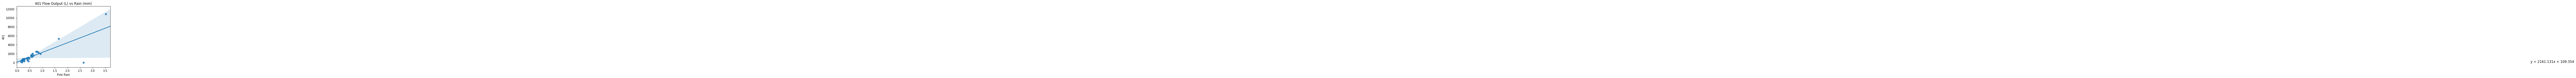

In [27]:
graph('Pole Rain', '401')

If you want to graph all the gardens at once, run the cell below. Replace 'Pole Rain' with the column name containing rain data, 'Start Date' with the column name containing the rain events' start date, and 'End Date' with the column name containing the rain events' end dates.

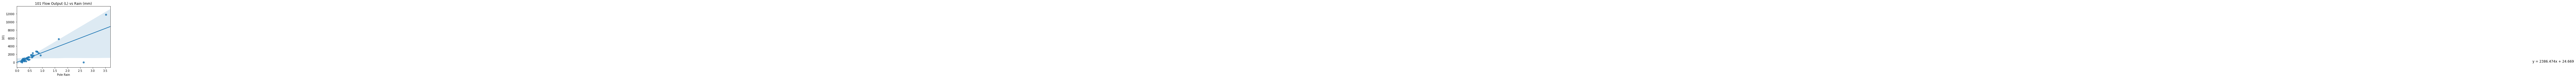

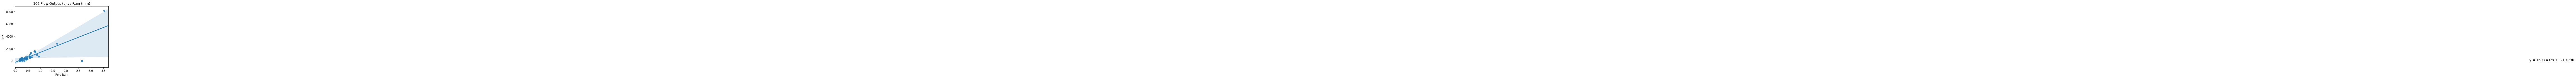

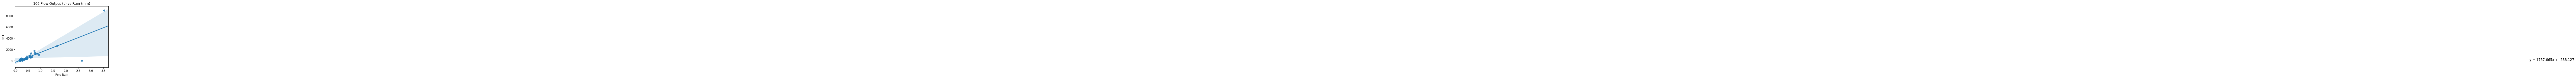

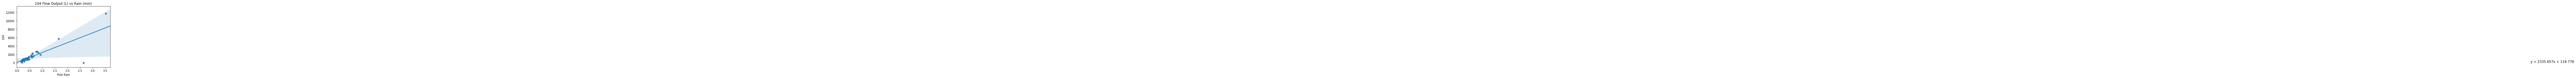

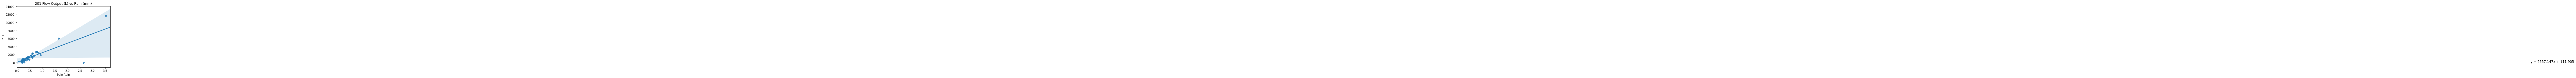

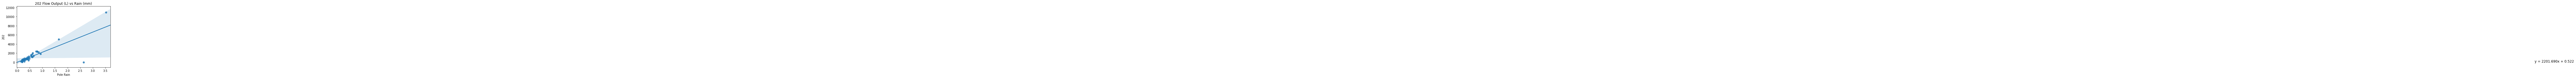

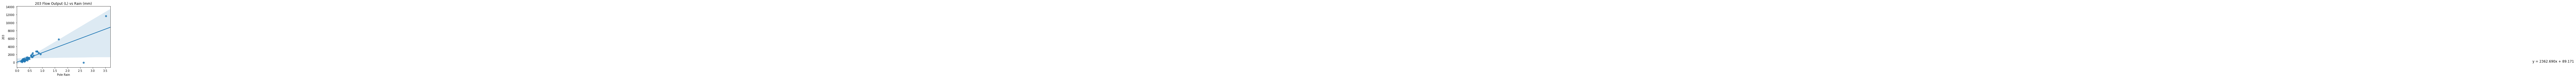

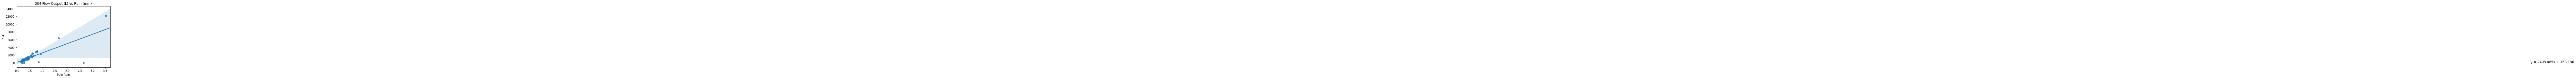

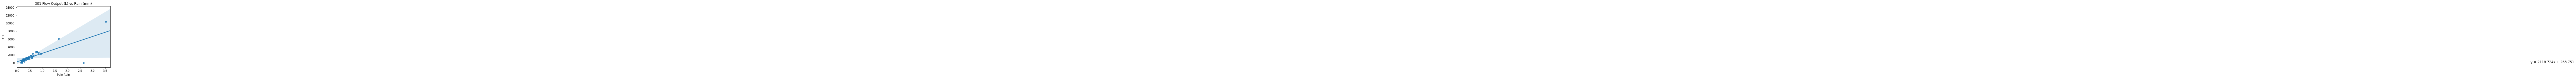

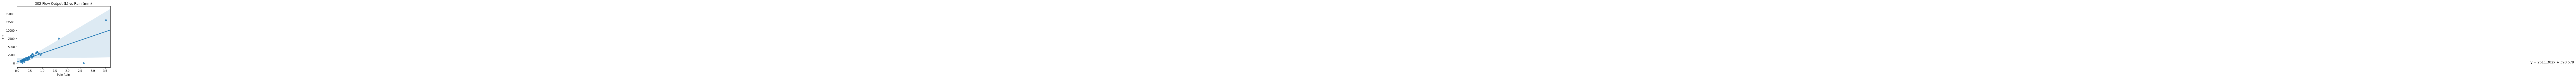

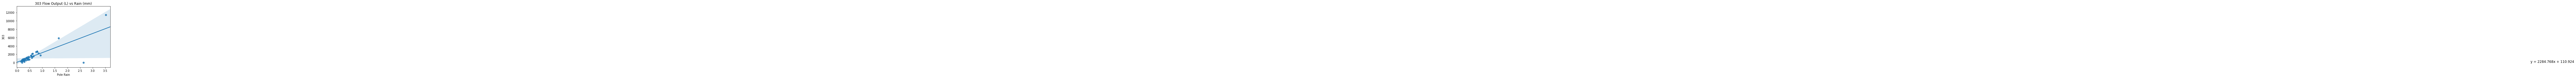

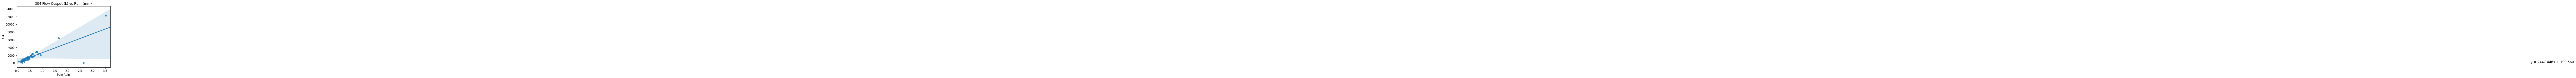

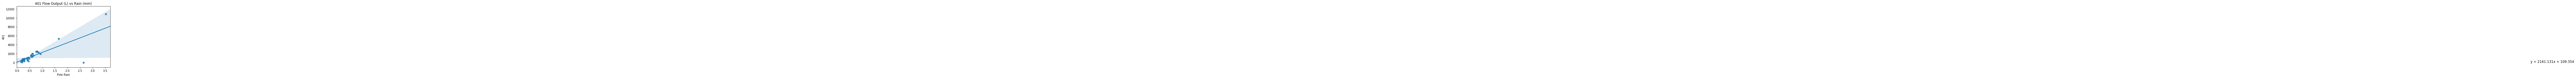

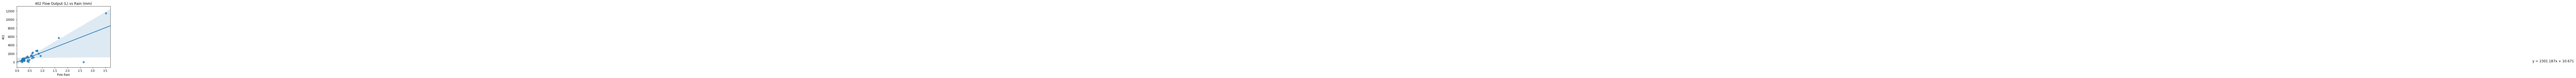

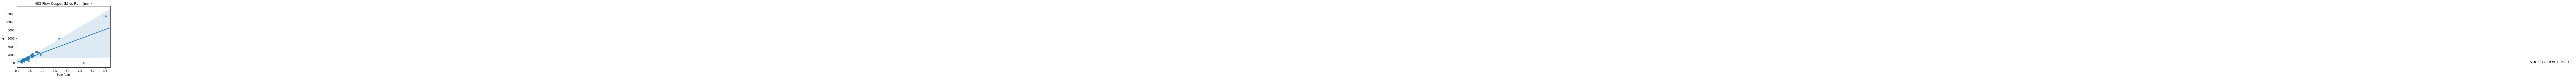

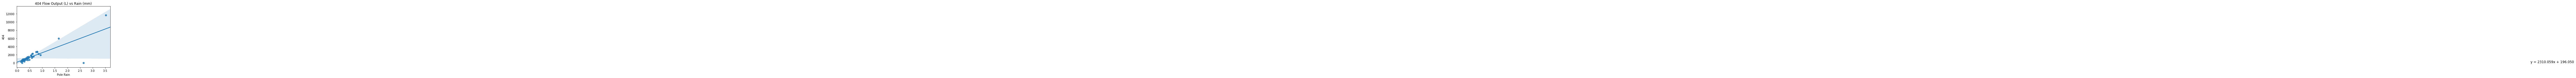

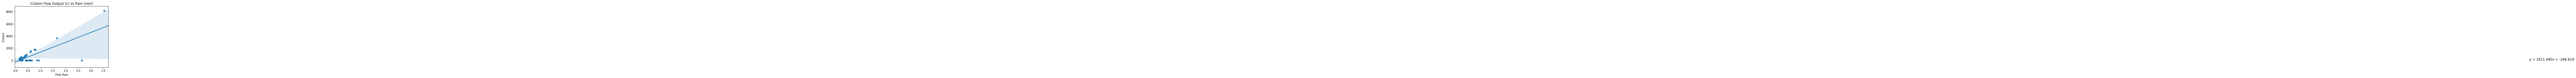

In [28]:
graphs = graph_all('Pole Rain', 'Start Date', 'End Date')

Let's use this data to do some pacing.

In [30]:
def get_pacing(stormEvent, garden, margin=.05, rain='Pole Rain'):
    garden_series = final_df[garden]
    rain_series = final_df['Pole Rain']
    valid_storms = []
    for i in range(len(rain_series) - 3):
        #print(i)
        if rain_series[i] < stormEvent+margin and rain_series[i] > stormEvent - margin:
            if (garden_series[i] != garden_series[i]):
                continue;
            valid_storms += [garden_series[i]]
            
    if len(valid_storms) == 0:
        print("not enough data!")
        return
    return np.mean(valid_storms) / 35


In [32]:
get_pacing(1, '102', margin=.05)

not enough data!
